In [1]:
using Revise
Revise.track("test_definitions.jl")
using KelpTest

using Plots
using PerceptualColourMaps

In [2]:
# Define colors
cvals = round.(Int, linspace(0, 256, 5)[2:4])
cm⁺ = convert.(ColorTypes.RGB, cmap("L3"))
cm⁻ = convert.(ColorTypes.RGB, cmap("L6"))
ce⁺, ca⁺, cg⁺ = cm⁺[cvals];
ce⁻, ca⁻, cg⁻ = cm⁻[cvals];

# Define Parameters

 scatter #           1
 scatter #           2


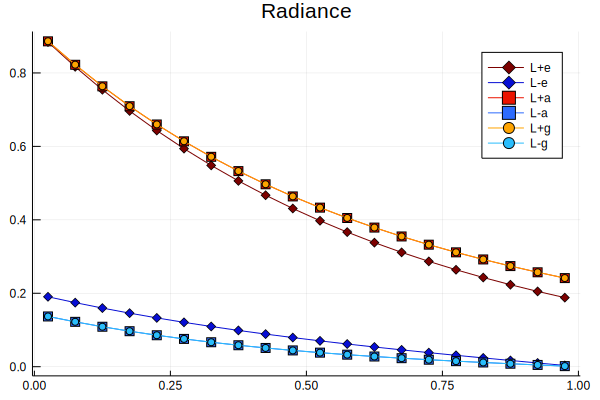

In [21]:
zmin = 0.0
zmax = 1.0
nzg = 20
# Incident radiance
I₀ = 0.92
# Absorption (1/m)
a = 1.0
# Scattering (1/m)
b = 1.5
# VSF [-1,1] -> ℝ⁺
β = cosθ -> 1/(2π)
# Remaining in current direction
β₀ = 0.5
# Switching directions
βπ = 1 - β₀
# Number of scatters for asymptotics
num_scatters = 2;

# Perform calculations
zg, L⁺g, L⁻g = asymptotics1d_grid(2π*I₀, a, b, β, zmin, zmax, nzg, num_scatters);
L⁺e, L⁻e = rte1d_exact(I₀, a, b*βπ, zmin, zmax, zg);
L⁺a, L⁻a, Lₙ, gₙ  = asymptotics1d_exact(I₀, a, b, βπ, zmin, zmax, zg, num_scatters);

# Plot full solution
plot(zg, L⁺e, marker=:diamond, color=ce⁺, label="L+e")
plot!(zg, L⁻e, marker=:diamond, color=ce⁻, label="L-e")
plot!(zg, L⁺a, marker=:square,  color=ca⁺, label="L+a")

plot!(zg, L⁻a, marker=:square,  color=ca⁻, label="L-a")
plot!(zg, L⁺g, marker=:circle,  color=cg⁺, label="L+g")
plot!(zg, L⁻g, marker=:circle,  color=cg⁻, label="L-g")
title!("Radiance")

# First order by hand

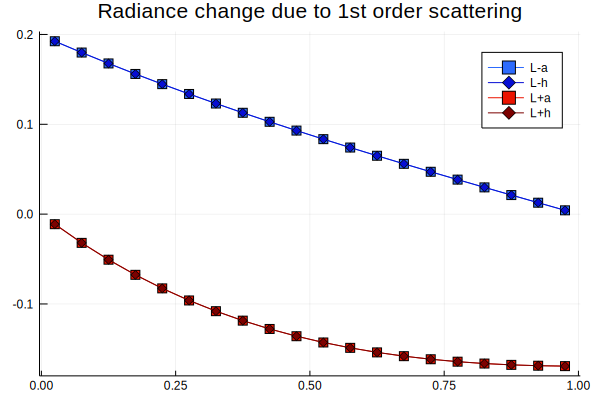

In [22]:
L₁⁺(z) = -βπ * I₀ * exp(-a*(z-zmin)) * (z - zmin)
L₁⁻(z) = -βπ * I₀ / (2*a) * exp(a*(zmin+z)) * (exp(-2*a*zmax) - exp(-2*a*z))

plot(zg, Lₙ[:,2,2], marker=:square, color=ca⁻, label="L-a") 
#plot!(zg, rad_scatter[:,2,2], marker=:circle, color=cg⁻, label="L-g")
plot!(zg, L₁⁻.(zg), marker=:diamond, color=ce⁻, label="L-h")

plot!(zg, Lₙ[:,1,2], marker=:square, color=ca⁺, label="L+a") 
#plot!(zg, rad_scatter[:,1,2], marker=:circle, color=cg⁺, label="L+g")
plot!(zg, L₁⁺.(zg), marker=:diamond, color=ce⁺, label="L+h")
title!("Radiance change due to 1st order scattering")